In [1]:
import numpy as np
import os
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

/home/rishal/.conda/envs/pharmnn/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
os.chdir('../')

In [3]:
dir_apo = '/home/rishal/apo2ph4'
dir_litpcba = '/home/rishal/apo2ph4/litpcba/'

In [4]:
nummols_dict={'ADRB2':[17, 312296],
'ALDH1': [7168, 144818],
'ESR1_ago': [13, 5538],
'ESR1_ant': [102, 5000],
'FEN1': [369, 355513],
'GBA': [166, 295816],
'IDH1': [39, 361834],
'KAT2A': [194, 348410],
'MAPK1': [308, 62686],
'MTORC1': [97, 33065],
'OPRK1': [24, 269697],
'PKM2': [546, 245897],
'PPARG': [27, 5186],
'TP53': [79, 4208],
'VDR': [884, 355889]}

In [5]:
litpcba_systems=nummols_dict.keys()

In [6]:
import json
def get_numfeats(json_file):
    with open(json_file) as f:
        data = json.load(f)
        points_actual=[]
        for point in data['points']:
            if "ExclusionSphere" not in point['name']:
                points_actual.append(point)
        numfeats=len(points_actual)
    return numfeats

In [7]:
lit_out=open("./data/litpcba_results.txt",'w')
for dir in sorted(litpcba_systems):
    print(dir)
    lit_out.write(dir+'\n')
    num_actives=nummols_dict[dir][0]
    num_decoys=nummols_dict[dir][1] - num_actives
    for file in sorted(os.listdir(dir_litpcba+dir)):
        if file.endswith(".sdf"):
            num_feats=get_numfeats(dir_litpcba+dir+'/'+file.split('.sdf')[0]+'.json')
            lit_out.write(file+' ')
            output=subprocess.check_output('cat '+dir_litpcba+dir+'/'+file.split('.gz')[0]+' | grep active | sort -u | wc -l',shell=True)
            num_active_hits=int(output.decode('utf-8').strip())
            output=subprocess.check_output('cat '+dir_litpcba+dir+'/'+file.split('.gz')[0]+' | grep decoy | sort -u | wc -l',shell=True)
            num_decoy_hits=int(output.decode('utf-8').strip())
            recall=num_active_hits/num_actives
            if num_active_hits+num_decoy_hits==0:
                precision=0
            else:    
                precision=num_active_hits/(num_active_hits+num_decoy_hits)
            if precision+recall==0:
                f1=0
            else:
                f1=2*precision*recall/(precision+recall)
            enrichment=precision/(num_actives/(num_actives+num_decoys))
            hit_rate=(num_active_hits+num_decoy_hits)/(num_actives+num_decoys)
            if (num_active_hits+num_decoy_hits) == 0:
                gh = 0
            else:
                gh=((num_active_hits*(3*num_actives+(num_active_hits+num_decoy_hits)))/(4*num_actives*(num_active_hits+num_decoy_hits)))*(1-(num_decoy_hits)/(num_decoys))
            
            lit_out.write(f'precision  {precision:.3f}, recall {recall:.3f}, f1 {f1:.3f}, enrichment {enrichment:.3f}, hit_rate {hit_rate:.3f}, num_feats {num_feats}, Guner-Henry {gh}\n')
lit_out.close()

ADRB2
ALDH1
ESR1_ago
ESR1_ant
FEN1
GBA
IDH1
KAT2A
MAPK1
MTORC1
OPRK1
PKM2
PPARG
TP53
VDR


In [ ]:
parent_dir = '/home/rishal/apo2ph4/litpcba_ligand_prediction/'
lit_out=open("./data/litpcba_results.txt",'a')
for dir in sorted(litpcba_systems):
    print(dir)
    lit_out.write(dir+'\n')
    num_actives=nummols_dict[dir][0]
    num_decoys=nummols_dict[dir][1] - num_actives
    for file in sorted(os.listdir(parent_dir+dir)):
        if file.endswith(".json"):
            num_feats=get_numfeats(parent_dir+dir+'/'+file)
            lit_out.write(file+' ')
            output=subprocess.check_output('cat '+parent_dir+dir+'/'+file.replace('json','txt')+' | grep active | sort -u | wc -l',shell=True)
            num_active_hits=int(output.decode('utf-8').strip())
            output=subprocess.check_output('cat '+parent_dir+dir+'/'+file.replace('json','txt')+' | grep decoy | sort -u | wc -l',shell=True)
            num_decoy_hits=int(output.decode('utf-8').strip())
            recall=num_active_hits/num_actives
            if num_active_hits+num_decoy_hits==0:
                precision=0
            else:    
                precision=num_active_hits/(num_active_hits+num_decoy_hits)
            if precision+recall==0:
                f1=0
            else:
                f1=2*precision*recall/(precision+recall)
            enrichment=precision/(num_actives/(num_actives+num_decoys))
            hit_rate=(num_active_hits+num_decoy_hits)/(num_actives+num_decoys)
            if (num_active_hits+num_decoy_hits) == 0:
                gh = 0
            else:
                gh=((num_active_hits*(3*num_actives+(num_active_hits+num_decoy_hits)))/(4*num_actives*(num_active_hits+num_decoy_hits)))*(1-(num_decoy_hits)/(num_decoys))
            
            lit_out.write(f'precision  {precision:.3f}, recall {recall:.3f}, f1 {f1:.3f}, enrichment {enrichment:.3f}, hit_rate {hit_rate:.3f}, num_feats {num_feats}, Guner-Henry {gh}\n')
lit_out.close()


ADRB2
ALDH1
ESR1_ago
ESR1_ant
FEN1
GBA
IDH1
KAT2A
MAPK1
MTORC1
OPRK1
PKM2
PPARG
TP53
VDR


# load df and create latex table

In [12]:
df=pd.DataFrame(columns=['system','model','precision','recall','f1','enrichment','hit_rate','num_feats'])
litpcba_data=open("./data/litpcba_results.txt",'r')
for line in litpcba_data:
    if len(line.split())==1:
        receptor_system=line.strip()
    else:
        print(line)
        system=receptor_system+'_'+line.split('_')[0].split('_')[0]
        model=line.split(' ')[0]
        precision=float(line.split()[2].strip(','))
        recall=float(line.split()[4].strip(','))
        f1=float(line.split()[6].strip(','))
        enrichment=float(line.split()[8].strip(','))
        hit_rate=float(line.split()[10].strip(','))
        num_feats=int(line.split()[12].strip(','))
        gh=float(line.split()[14].strip())
        df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
print(df)  


4lde_4_model_all_points_1.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 4, Guner-Henry 0.0

4lde_4_model_all_points_2.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 4, Guner-Henry 0.0

4lde_4_model_all_points_3.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 4, Guner-Henry 0.0

4lde_4_model_all_points_4.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 4, Guner-Henry 0.0

4lde_4_model_all_points_5.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.084, num_feats 4, Guner-Henry 0.0

4lde_apo2ph4.sdf precision  0.000, recall 0.412, f1 0.000, enrichment 3.585, hit_rate 0.115, num_feats 3, Guner-Henry 0.09124767387466848

4lde_model_all_points_1.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.030, num_feats 3, Guner-Henry 0.0

4lde_model_all_points_2.sdf precision  0.000, r

/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':rec

6b0f_apo2ph4.sdf precision  0.036, recall 0.078, f1 0.049, enrichment 1.751, hit_rate 0.045, num_feats 4, Guner-Henry 0.044347618590106525

6b0f_model_all_points_1.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 4, Guner-Henry 0

6b0f_model_all_points_2.sdf precision  0.042, recall 0.245, f1 0.072, enrichment 2.067, hit_rate 0.119, num_feats 3, Guner-Henry 0.08212094900504228

6b0f_model_all_points_3.sdf precision  0.021, recall 0.157, f1 0.037, enrichment 1.028, hit_rate 0.153, num_feats 3, Guner-Henry 0.04656364177117497

6b0f_model_all_points_4.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 3, Guner-Henry 0

6b0f_model_all_points_5.sdf precision  0.037, recall 0.049, f1 0.042, enrichment 1.816, hit_rate 0.027, num_feats 3, Guner-Henry 0.03897015455154431

5fv7_4_model_all_points_1.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 4, Guner-Henry 0.0

5fv7_4_mod

/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':rec

5mlj_4_apo2ph4.sdf precision  0.001, recall 0.139, f1 0.001, enrichment 1.324, hit_rate 0.105, num_feats 4, Guner-Henry 0.031630689945296775

5mlj_4_model_all_points_1.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 4, Guner-Henry 0

5mlj_4_model_all_points_2.sdf precision  0.000, recall 0.005, f1 0.001, enrichment 0.658, hit_rate 0.008, num_feats 4, Guner-Henry 0.0015510283834850422

5mlj_4_model_all_points_3.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.002, num_feats 4, Guner-Henry 0.0

5mlj_4_model_all_points_4.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 4, Guner-Henry 0

5mlj_4_model_all_points_5.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 4, Guner-Henry 0

5mlj_5_apo2ph4.sdf precision  0.001, recall 0.057, f1 0.002, enrichment 1.387, hit_rate 0.041, num_feats 5, Guner-Henry 0.01415129344016622

5mlj_model_all_points_1.s

/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':rec

3me3_apo2ph4.sdf precision  0.004, recall 0.185, f1 0.008, enrichment 1.768, hit_rate 0.105, num_feats 6, Guner-Henry 0.04404998645485173

3me3_model_all_points_1.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 3, Guner-Henry 0.0

3me3_model_all_points_2.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.001, num_feats 3, Guner-Henry 0.0

3me3_model_all_points_3.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 6, Guner-Henry 0

3me3_model_all_points_4.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 3, Guner-Henry 0.0

3me3_model_all_points_5.sdf precision  0.002, recall 0.035, f1 0.004, enrichment 0.951, hit_rate 0.037, num_feats 3, Guner-Henry 0.00990761957541632

5y2t_4_model_all_points_1.sdf precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 5, Guner-Henry 0

5y2t_4_model_all_points_2.sdf precision  0.

/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':rec

4lde_ligand_min4_model_ligand_predicted_pharmacophores.json precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.000, num_feats 4 Guner-Henry 0.0

5ac2_ligand_min3_model_ligand_predicted_pharmacophores.json precision  0.051, recall 0.573, f1 0.093, enrichment 1.021, hit_rate 0.561, num_feats 3 Guner-Henry 0.07962317876387304

5ac2_ligand_min4_model_ligand_predicted_pharmacophores.json precision  0.054, recall 0.215, f1 0.087, enrichment 1.100, hit_rate 0.195, num_feats 4 Guner-Henry 0.07619781602938165

2qr9_ligand_min3_model_ligand_predicted_pharmacophores.json precision  0.003, recall 0.615, f1 0.006, enrichment 1.272, hit_rate 0.484, num_feats 3, Guner-Henry 0.08059916567527833

2qr9_ligand_min4_model_ligand_predicted_pharmacophores.json precision  0.000, recall 0.000, f1 0.000, enrichment 0.000, hit_rate 0.014, num_feats 4 Guner-Henry 0.0

2pog_ligand_min3_model_ligand_predicted_pharmacophores.json precision  0.015, recall 0.147, f1 0.027, enrichment 0.714, hit_ra

/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/1219672425.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':rec

         system                                              model precision  \
0    ADRB2_4lde                      4lde_4_model_all_points_1.sdf       0.0   
1    ADRB2_4lde                      4lde_4_model_all_points_2.sdf       0.0   
2    ADRB2_4lde                      4lde_4_model_all_points_3.sdf       0.0   
3    ADRB2_4lde                      4lde_4_model_all_points_4.sdf       0.0   
4    ADRB2_4lde                      4lde_4_model_all_points_5.sdf       0.0   
..          ...                                                ...       ...   
226  PPARG_5z5s  5z5s_ligand_min4_model_ligand_predicted_pharma...       0.0   
227   TP53_4agq  4agq_ligand_min3_model_ligand_predicted_pharma...     0.014   
228   TP53_4agq  4agq_ligand_min4_model_ligand_predicted_pharma...     0.014   
229    VDR_3a2i  3a2i_ligand_min3_model_ligand_predicted_pharma...     0.003   
230    VDR_3a2i  3a2i_ligand_min4_model_ligand_predicted_pharma...       0.0   

    recall     f1 enrichment hit_rate n

In [13]:
df_ligand_random=pd.DataFrame(columns=['system','model','precision','recall','f1','enrichment','hit_rate','num_feats'])
parent_dir = '/home/rishal/apo2ph4/litpcba_ligand_exclusion/'
for dir in sorted(litpcba_systems):
    print(dir)
    f1_scores=[]
    num_actives=nummols_dict[dir][0]
    num_decoys=nummols_dict[dir][1] - num_actives
    receptor_current=dir
    for file in sorted(os.listdir(parent_dir+dir)):
        if receptor_current==dir:
            receptor_current=file.split('_')[0]
        else:
            if file.split('_')[0]!=receptor_current:
                if len(f1_scores)>0:
                    f1_scores=np.array(f1_scores)
                    df=df.append(df_ligand_random[df_ligand_random['system']==dir+'_'+receptor_current].sort_values('f1',ascending=False).iloc[0],ignore_index=True) 
                f1_scores=[]
                receptor_current=dir
        if file.endswith(".txt") and len(file.split('_'))>2 and int(file.split('_')[2])<=5:
            num_feats=get_numfeats(parent_dir+dir+'/'+file.replace('txt','json'))
            output=subprocess.check_output('cat '+parent_dir+dir+'/'+file.replace('json','txt')+' | grep active | sort -u | wc -l',shell=True)
            num_active_hits=int(output.decode('utf-8').strip())
            output=subprocess.check_output('cat '+parent_dir+dir+'/'+file.replace('json','txt')+' | grep decoy | sort -u | wc -l',shell=True)
            num_decoy_hits=int(output.decode('utf-8').strip())
            recall=num_active_hits/num_actives
            if num_active_hits+num_decoy_hits==0:
                precision=0
            else:    
                precision=num_active_hits/(num_active_hits+num_decoy_hits)
            if precision+recall==0:
                f1=0
            else:
                f1=2*precision*recall/(precision+recall)
            f1_scores.append(f1)
            enrichment=precision/(num_actives/(num_actives+num_decoys))
            hit_rate=(num_active_hits+num_decoy_hits)/(num_actives+num_decoys)
            if (num_active_hits+num_decoy_hits) == 0:
                gh = 0
            else:
                gh=((num_active_hits*(3*num_actives+(num_active_hits+num_decoy_hits)))/(4*num_actives*(num_active_hits+num_decoy_hits)))*(1-(num_decoy_hits)/(num_decoys))
            df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
    if len(f1_scores)>0:
        df=df.append(df_ligand_random[df_ligand_random['system']==dir+'_'+receptor_current].sort_values('f1',ascending=False).iloc[0],ignore_index=True) 

ADRB2


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

ALDH1


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

ESR1_ago


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

ESR1_ant


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

FEN1
GBA


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

IDH1


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

KAT2A


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

MAPK1


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

MTORC1


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

OPRK1


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

PKM2


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

PPARG


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

TP53


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

VDR


/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ligand_random=df_ligand_random.append({'system':dir+'_'+receptor_current,'model':'best_ligand','min_feats': 3,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate, 'num_feats': num_feats, 'Guner-Henry': gh},ignore_index=True)
/tmp/ipykernel_3236977/3460608052.py:41: FutureWarning: The frame.append method is deprecated and will be removed fr

In [14]:
df.tail(20)

system                                              model  \
227      TP53_4agq  4agq_ligand_min3_model_ligand_predicted_pharma...   
228      TP53_4agq  4agq_ligand_min4_model_ligand_predicted_pharma...   
229       VDR_3a2i  3a2i_ligand_min3_model_ligand_predicted_pharma...   
230       VDR_3a2i  3a2i_ligand_min4_model_ligand_predicted_pharma...   
231     ADRB2_4lde                                        best_ligand   
232     ALDH1_5ac2                                        best_ligand   
233  ESR1_ago_2qr9                                        best_ligand   
234  ESR1_ant_2pog                                        best_ligand   
235  ESR1_ant_6b0f                                        best_ligand   
236       GBA_3rik                                        best_ligand   
237      IDH1_5tqh                                        best_ligand   
238     KAT2A_5mlj                                        best_ligand   
239     MAPK1_3w55                                        best_ligand   
240    MTORC1_4fap                                        best_ligand   
241     OPRK1_6b73                                        best_ligand   
242      PKM2_3me3                                        best_ligand   
243     PPARG_5y2t                                        best_ligand   
244     PPARG_5z5s                                        best_ligand   
245      TP53_4agq                                        best_ligand   
246       VDR_3a2i                                        best_ligand   

    precision    recall        f1   enrichment  hit_rate num_feats  \
227     0.014     0.025     0.018        0.766     0.033         4   
228     0.014     0.025     0.018        0.766     0.033         4   
229     0.003     0.094     0.005        1.056     0.089         3   
230       0.0       0.0       0.0          0.0       0.0         5   
231       0.5  0.058824  0.105263  9185.176471  0.000006         5   
232  0.050271  0.607143  0.092855     1.015655  0.597785         3   
233  0.046512  0.153846  0.071429    19.813953  0.007765         4   
234  0.030351  0.745098  0.058327     1.487816    0.5008         3   
235  0.067204  0.490196  0.118203     3.294328    0.1488         3   
236  0.030303  0.018072  0.022642     54.00073  0.000335         4   
237       0.1  0.025641  0.040816   927.779487  0.000028         5   
238  0.004283  0.010309  0.006051      7.69134   0.00134         4   
239  0.046512  0.012987  0.020305     9.466324  0.001372         5   
240   0.01676  0.030928  0.021739      5.71301  0.005414         3   
241  0.003636  0.041667  0.006689    40.863182   0.00102         5   
242  0.041096  0.005495  0.009693    18.507978  0.000297         4   
243  0.055556  0.148148  0.080808    10.670782  0.013884         3   
244       0.5  0.111111  0.181818    96.037037  0.001157         4   
245  0.057613  0.177215  0.086957     3.068813  0.057747         3   
246  0.010363  0.013575  0.011753     4.171911  0.003254         5   

     Guner-Henry  min_feats  
227     0.016552        NaN  
228     0.016552        NaN  
229     0.023179        NaN  
230     0.000000        NaN  
231     0.389705        3.0  
232     0.076308        3.0  
233     0.072801        3.0  
234     0.105415        3.0  
235     0.148447        3.0  
236     0.027236        3.0  
237     0.081408        3.0  
238     0.005782        3.0  
239     0.038080        3.0  
240     0.020193        3.0  
241     0.013131        3.0  
242     0.032186        3.0  
243     0.077666        3.0  
244     0.402544        3.0  
245     0.082660        3.0  
246     0.011130        3.0

In [15]:
df['min_feats']=3
df.loc[df['model'].str.contains('_4_'), 'min_feats'] = 4
df.loc[df['model'].str.contains('min4_'), 'min_feats'] = 4
df.loc[df['model'].str.contains('model\_all\_points\_1'), 'model'] = 'model_cnn_1'
df.loc[df['model'].str.contains('model\_all\_points\_2'), 'model'] = 'model_cnn_2'
df.loc[df['model'].str.contains('model\_all\_points\_3'), 'model'] = 'model_cnn_3'
df.loc[df['model'].str.contains('model\_all\_points\_4'), 'model'] = 'model_cnn_4'
df.loc[df['model'].str.contains('model\_all\_points\_5'), 'model'] = 'model_cnn_5'
df.loc[df['model'].str.contains('apo2ph4'), 'model'] = 'Apo2ph4'
df.loc[df['model'].str.contains('model_ligand'), 'model'] = 'model_ligand'
df['Target']='meh'
df['Target'] = df['system'].str.split('_').str[:-1].str.join('_')
df['system']=df['system'].str.split('_').str[-1]
df['system']=df['system'].str.upper()
dtypes={'system':'object','model':'object','min_feats':int,'precision':float,'recall':float,'f1':float,'enrichment':float,'hit_rate':float, 'num_feats':int}
df=df.astype(dtypes)
df.set_index(['Target','system','model','min_feats'],inplace=True)
df.sort_index(inplace=True)
print(df.to_latex(index=True,float_format="%.3f",sparsify=True))

\begin{tabular}{llllrrrrrrr}
\toprule
    &      &              &   &  precision &  recall &    f1 &  enrichment &  hit\_rate &  num\_feats &  Guner-Henry \\
Target & system & model & min\_feats &            &         &       &             &           &            &              \\
\midrule
ADRB2 & 4LDE & Apo2ph4 & 3 &      0.000 &   0.412 & 0.000 &       3.585 &     0.115 &          3 &        0.091 \\
    &      & best\_ligand & 3 &      0.500 &   0.059 & 0.105 &    9185.176 &     0.000 &          5 &        0.390 \\
    &      & model\_cnn\_1 & 3 &      0.000 &   0.000 & 0.000 &       0.000 &     0.030 &          3 &        0.000 \\
    &      &              & 4 &      0.000 &   0.000 & 0.000 &       0.000 &     0.000 &          4 &        0.000 \\
    &      & model\_cnn\_2 & 3 &      0.000 &   0.000 & 0.000 &       0.000 &     0.000 &          4 &        0.000 \\
    &      &              & 4 &      0.000 &   0.000 & 0.000 &       0.000 &     0.000 &          4 &        0.000 \\
 

/tmp/ipykernel_3236977/392244001.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=True,float_format="%.3f",sparsify=True))


# random selection of features

In [11]:
df=pd.DataFrame(columns=['system','model','precision','recall','f1','enrichment','hit_rate'])
litpcba_data=open("./data/litpcba_results.txt",'r')
for line in litpcba_data:
    if len(line.split())==1:
        receptor_system=line.strip()
    else:
        system=receptor_system+'_'+line.split('_')[0].split('_')[0]
        model=line.split(' ')[0]
        precision=float(line.split()[2].strip(','))
        recall=float(line.split()[4].strip(','))
        f1=float(line.split()[6].strip(','))
        enrichment=float(line.split()[8].strip(','))
        hit_rate=float(line.split()[10].strip(','))
        df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
print(df)  

/tmp/ipykernel_124961/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_124961/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_124961/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykerne

         system                                              model precision  \
0    ADRB2_4lde                      4lde_4_model_all_points_1.sdf       0.0   
1    ADRB2_4lde                      4lde_4_model_all_points_2.sdf       0.0   
2    ADRB2_4lde                      4lde_4_model_all_points_3.sdf       0.0   
3    ADRB2_4lde                      4lde_4_model_all_points_4.sdf       0.0   
4    ADRB2_4lde                      4lde_4_model_all_points_5.sdf       0.0   
..          ...                                                ...       ...   
226  PPARG_5z5s  5z5s_ligand_min4_model_ligand_predicted_pharma...       0.0   
227   TP53_4agq  4agq_ligand_min3_model_ligand_predicted_pharma...     0.014   
228   TP53_4agq  4agq_ligand_min4_model_ligand_predicted_pharma...     0.014   
229    VDR_3a2i  3a2i_ligand_min3_model_ligand_predicted_pharma...     0.003   
230    VDR_3a2i  3a2i_ligand_min4_model_ligand_predicted_pharma...       0.0   

    recall     f1 enrichment hit_rate  

/tmp/ipykernel_124961/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_124961/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_124961/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykerne

In [17]:
parent_dir = '/home/rishal/apo2ph4/litpcba_ligand_exclusion/'
for dir in sorted(litpcba_systems):
    print(dir)
    f1_scores=[]
    num_actives=nummols_dict[dir][0]
    num_decoys=nummols_dict[dir][1] - num_actives
    receptor_current=dir
    for file in sorted(os.listdir(parent_dir+dir)):
        if receptor_current==dir:
            receptor_current=file.split('_')[0]
        else:
            if file.split('_')[0]!=receptor_current:
                if len(f1_scores)>0:
                    f1_scores=np.array(f1_scores)
                    df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True) 
                f1_scores=[]
                receptor_current=dir
        if file.endswith(".txt") and len(file.split('_'))>2 and int(file.split('_')[2])<=5:
            output=subprocess.check_output('cat '+parent_dir+dir+'/'+file.replace('json','txt')+' | grep active | sort -u | wc -l',shell=True)
            num_active_hits=int(output.decode('utf-8').strip())
            output=subprocess.check_output('cat '+parent_dir+dir+'/'+file.replace('json','txt')+' | grep decoy | sort -u | wc -l',shell=True)
            num_decoy_hits=int(output.decode('utf-8').strip())
            recall=num_active_hits/num_actives
            if num_active_hits+num_decoy_hits==0:
                precision=0
            else:    
                precision=num_active_hits/(num_active_hits+num_decoy_hits)
            if precision+recall==0:
                f1=0
            else:
                f1=2*precision*recall/(precision+recall)
            f1_scores.append(f1)
    if len(f1_scores)>0:
        f1_scores=np.array(f1_scores)
        df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True) 
    

ADRB2


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


ALDH1


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


ESR1_ago


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


ESR1_ant


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)
/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


FEN1
GBA


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


IDH1


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


KAT2A


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


MAPK1


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


MTORC1


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


OPRK1


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


PKM2


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


PPARG


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)
/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


TP53


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


VDR


/tmp/ipykernel_124961/827162926.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


In [18]:
df = df.astype({'f1': float})
df['method']='PharmRL_CNN'
df.loc[df['model'].str.contains('apo2ph4'),'method']='Apo2ph4'
df.loc[df['model'].str.contains('ligand_min3'),'method']='PharmRL_Ligand_3'
df.loc[df['model'].str.contains('ligand_min4'),'method']='PharmRL_Ligand_4'
df.loc[df['model'].str.contains('Ligand_best'),'method']='Ligand_best'
print(df[df['model'].str.contains('apo2ph4')])

            system               model precision recall     f1 enrichment  \
5       ADRB2_4lde    4lde_apo2ph4.sdf       0.0  0.412  0.000      3.585   
16      ALDH1_5ac2    5ac2_apo2ph4.sdf     0.067  0.003  0.007      1.347   
27   ESR1_ago_2qr9    2qr9_apo2ph4.sdf     0.006  0.231  0.013      2.748   
38   ESR1_ant_2pog    2pog_apo2ph4.sdf     0.032  0.157  0.053      1.565   
49   ESR1_ant_6b0f    6b0f_apo2ph4.sdf     0.036  0.078  0.049      1.751   
60       FEN1_5fv7    5fv7_apo2ph4.sdf     0.002  0.057  0.004      1.764   
71        GBA_3rik    3rik_apo2ph4.sdf     0.003  0.054  0.006      5.633   
82       IDH1_4i3l    4i3l_apo2ph4.sdf       0.0    0.0  0.000        0.0   
93       IDH1_5tqh    5tqh_apo2ph4.sdf       0.0  0.231  0.000      1.731   
99      KAT2A_5mlj  5mlj_4_apo2ph4.sdf     0.001  0.139  0.001      1.324   
105     KAT2A_5mlj  5mlj_5_apo2ph4.sdf     0.001  0.057  0.002      1.387   
116     MAPK1_3w55    3w55_apo2ph4.sdf     0.007  0.182  0.013       1.42   

In [19]:
print(df[df['method']=='Apo2ph4'])

            system               model precision recall     f1 enrichment  \
5       ADRB2_4lde    4lde_apo2ph4.sdf       0.0  0.412  0.000      3.585   
16      ALDH1_5ac2    5ac2_apo2ph4.sdf     0.067  0.003  0.007      1.347   
27   ESR1_ago_2qr9    2qr9_apo2ph4.sdf     0.006  0.231  0.013      2.748   
38   ESR1_ant_2pog    2pog_apo2ph4.sdf     0.032  0.157  0.053      1.565   
49   ESR1_ant_6b0f    6b0f_apo2ph4.sdf     0.036  0.078  0.049      1.751   
60       FEN1_5fv7    5fv7_apo2ph4.sdf     0.002  0.057  0.004      1.764   
71        GBA_3rik    3rik_apo2ph4.sdf     0.003  0.054  0.006      5.633   
82       IDH1_4i3l    4i3l_apo2ph4.sdf       0.0    0.0  0.000        0.0   
93       IDH1_5tqh    5tqh_apo2ph4.sdf       0.0  0.231  0.000      1.731   
99      KAT2A_5mlj  5mlj_4_apo2ph4.sdf     0.001  0.139  0.001      1.324   
105     KAT2A_5mlj  5mlj_5_apo2ph4.sdf     0.001  0.057  0.002      1.387   
116     MAPK1_3w55    3w55_apo2ph4.sdf     0.007  0.182  0.013       1.42   

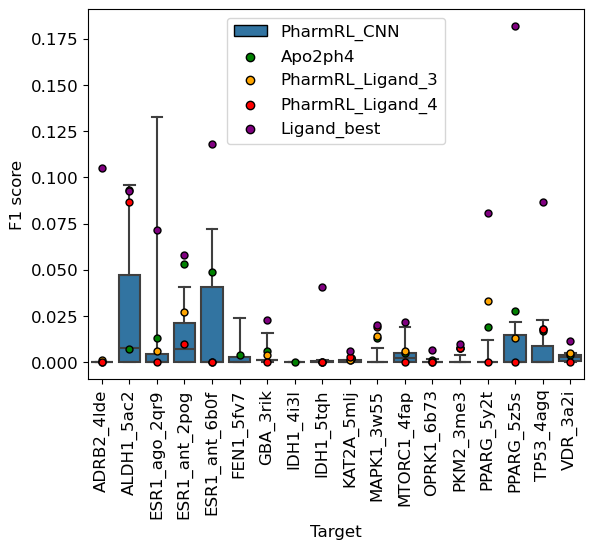

In [20]:
matplotlib.rcParams.update({'font.size': 12})
ax=sns.boxplot(x='system',y='f1',data=df[df['method']=='PharmRL_CNN'],hue='method',whis=[0,100])
#ax=sns.stripplot(x='system',y='f1',data=df,hue='method',dodge=True)

sns.stripplot(x='system',y='f1',data=df[df['method']=='Apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['green'])
sns.stripplot(x='system',y='f1',data=df[df['method']=='PharmRL_Ligand_3'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
sns.stripplot(x='system',y='f1',data=df[df['method']=='PharmRL_Ligand_4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['red'])
sns.stripplot(x='system',y='f1',data=df[df['method']=='Ligand_best'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['purple'])
handles, labels = ax.get_legend_handles_labels()
for ha in handles:
    ha.set_edgecolor('black')
    ha.set_linewidth(1)
lgd=ax.legend(handles, labels, loc='upper center')
#ax.hlines(1,-1,8,linestyles='dashed',colors='black')

ax.set_ylabel('F1 score')
ax.set_xlabel('Target')
plt.xticks(rotation='vertical')
plt.savefig('LitPCBA_f1_results.pdf',bbox_inches='tight')

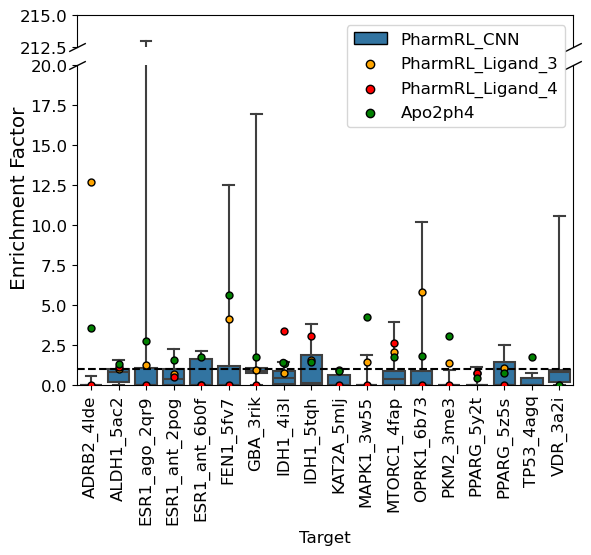

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1, 10]})
fig.subplots_adjust(hspace=0.1) 

sns.boxplot(x='system',y='enrichment',data=df[df['method']=='PharmRL_CNN'],hue='method',whis=[0,100],ax=ax1)
sns.boxplot(x='system',y='enrichment',data=df[df['method']=='PharmRL_CNN'],hue='method',whis=[0,100],ax=ax2)
#ax=sns.stripplot(x='system',y='f1',data=df,hue='method',dodge=True)
sns.stripplot(x='system',y='enrichment',data=df[df['method']=='PharmRL_Ligand_3'],ax=ax2,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
sns.stripplot(x='system',y='enrichment',data=df[df['method']=='PharmRL_Ligand_4'],ax=ax2,hue='method',linewidth=1,edgecolor='black',palette=['red'])
sns.stripplot(x='system',y='enrichment',data=df[df['method']=='Apo2ph4'],ax=ax2,hue='method',linewidth=1,edgecolor='black',palette=['green'])

handles, labels = ax2.get_legend_handles_labels()
for ha in handles:
    ha.set_edgecolor('black') 
    ha.set_linewidth(1)
lgd=ax2.legend(handles, labels, loc='upper right',bbox_to_anchor=(1, 1.15))
ax1.legend_.remove()
#ax2.legend_.remove()
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().get_label().set_visible(False)
#ax.hlines(1,-1,8,linestyles='dashed',colors='black')
ax1.set_ylim(212.5,215)
ax2.set_ylim(0,20)
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.hlines(1,-0.5,17.5,linestyles='dashed',colors='black')
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
#ax2.set_ylabel('Enrichment Factor')
ax2.axes.get_yaxis().get_label().set_visible(False)
plt.xticks(rotation='vertical')
ax2.set_xlabel('Target',fontsize=12)
fig.supylabel('Enrichment Factor')
plt.savefig('LitPCBA_enrichment_results.pdf',bbox_inches='tight')

In [49]:
ax=sns.boxplot(x='system',y='precision',data=df[df['method']=='pharmnn'],hue='method',whis=[0,100])
sns.stripplot(x='system',y='precision',data=df[df['method']=='apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
plt.xticks(rotation='vertical')

ValueError: min() arg is an empty sequence

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'ADRB2_4lde'),
  Text(1, 0, 'ALDH1_5ac2'),
  Text(2, 0, 'ESR1_ago_2qr9'),
  Text(3, 0, 'ESR1_ant_2pog'),
  Text(4, 0, 'ESR1_ant_6b0f'),
  Text(5, 0, 'FEN1_5fv7'),
  Text(6, 0, 'GBA_3rik'),
  Text(7, 0, 'IDH1_4i3l'),
  Text(8, 0, 'IDH1_5tqh'),
  Text(9, 0, 'KAT2A_5mlj'),
  Text(10, 0, 'MAPK1_3w55'),
  Text(11, 0, 'MTORC1_4fap'),
  Text(12, 0, 'OPRK1_6b73'),
  Text(13, 0, 'PKM2_3me3'),
  Text(14, 0, 'PPARG_5y2t'),
  Text(15, 0, 'PPARG_5z5s'),
  Text(16, 0, 'TP53_4agq'),
  Text(17, 0, 'VDR_3a2i')])

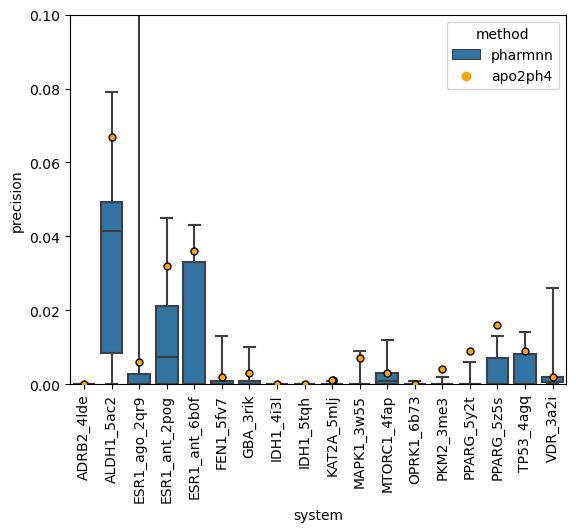

In [20]:
ax=sns.boxplot(x='system',y='precision',data=df[df['method']=='pharmnn'],hue='method',whis=[0,100])
sns.stripplot(x='system',y='precision',data=df[df['method']=='apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
ax.set_ylim(0,0.1)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'ADRB2_4lde'),
  Text(1, 0, 'ALDH1_5ac2'),
  Text(2, 0, 'ESR1_ago_2qr9'),
  Text(3, 0, 'ESR1_ant_2pog'),
  Text(4, 0, 'ESR1_ant_6b0f'),
  Text(5, 0, 'FEN1_5fv7'),
  Text(6, 0, 'GBA_3rik'),
  Text(7, 0, 'IDH1_4i3l'),
  Text(8, 0, 'IDH1_5tqh'),
  Text(9, 0, 'KAT2A_5mlj'),
  Text(10, 0, 'MAPK1_3w55'),
  Text(11, 0, 'MTORC1_4fap'),
  Text(12, 0, 'OPRK1_6b73'),
  Text(13, 0, 'PKM2_3me3'),
  Text(14, 0, 'PPARG_5y2t'),
  Text(15, 0, 'PPARG_5z5s'),
  Text(16, 0, 'TP53_4agq'),
  Text(17, 0, 'VDR_3a2i')])

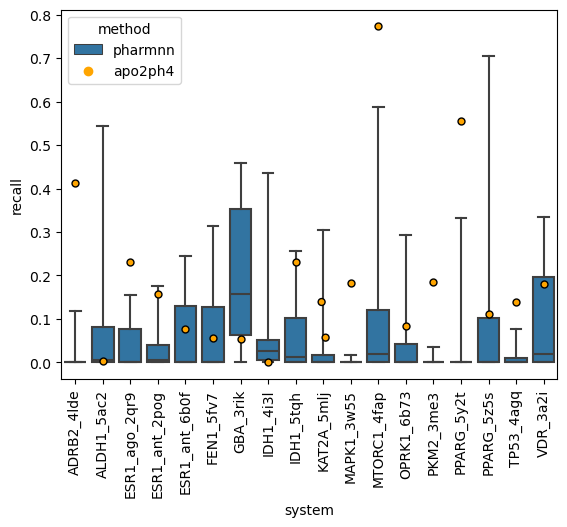

In [21]:
ax=sns.boxplot(x='system',y='recall',data=df[df['method']=='pharmnn'],hue='method',whis=[0,100])
sns.stripplot(x='system',y='recall',data=df[df['method']=='apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'ADRB2_4lde'),
  Text(1, 0, 'ALDH1_5ac2'),
  Text(2, 0, 'ESR1_ago_2qr9'),
  Text(3, 0, 'ESR1_ant_2pog'),
  Text(4, 0, 'ESR1_ant_6b0f'),
  Text(5, 0, 'FEN1_5fv7'),
  Text(6, 0, 'GBA_3rik'),
  Text(7, 0, 'IDH1_4i3l'),
  Text(8, 0, 'IDH1_5tqh'),
  Text(9, 0, 'KAT2A_5mlj'),
  Text(10, 0, 'MAPK1_3w55'),
  Text(11, 0, 'MTORC1_4fap'),
  Text(12, 0, 'OPRK1_6b73'),
  Text(13, 0, 'PKM2_3me3'),
  Text(14, 0, 'PPARG_5y2t'),
  Text(15, 0, 'PPARG_5z5s'),
  Text(16, 0, 'TP53_4agq'),
  Text(17, 0, 'VDR_3a2i')])

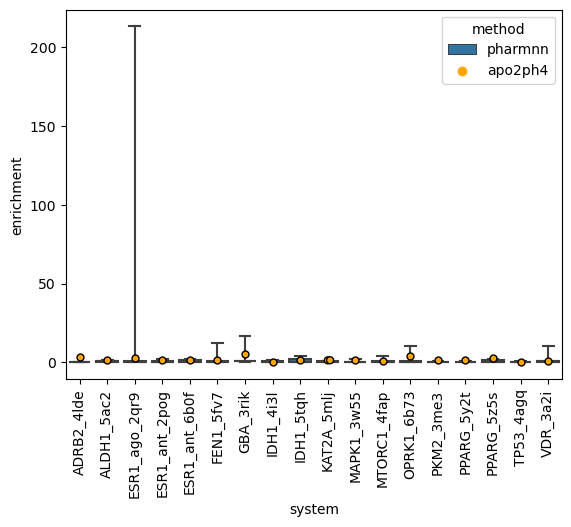

In [22]:
ax=sns.boxplot(x='system',y='enrichment',data=df[df['method']=='pharmnn'],hue='method',whis=[0,100])
sns.stripplot(x='system',y='enrichment',data=df[df['method']=='apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
plt.xticks(rotation='vertical')

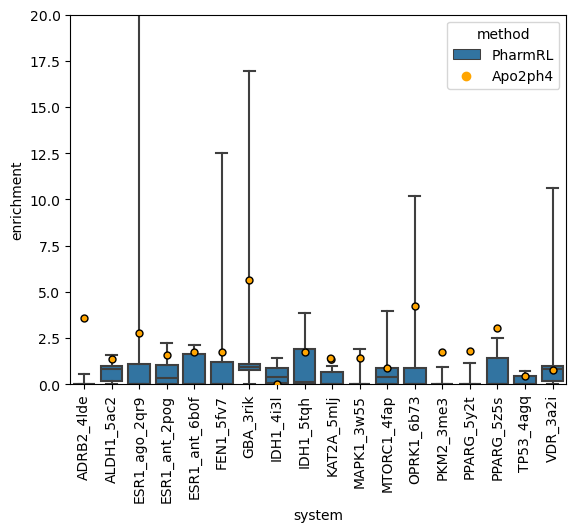

In [14]:
ax=sns.boxplot(x='system',y='enrichment',data=df[df['method']=='PharmRL'],hue='method',whis=[0,100])
sns.stripplot(x='system',y='enrichment',data=df[df['method']=='Apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
ax.set_ylim(0,20)
plt.xticks(rotation='vertical')
plt.savefig('enrichment_litpcba.png')

Generate ligand pharmacophore queries

In [34]:
for system in df['system'].unique():
    system_split=system.split('_')
    if len(system_split)==2:
        system_prot=system.split('_')[0]
    else:
        system_prot=system.split('_')[0]+'_'+system.split('_')[1]
    system_pdb=system.split('_')[-1]
    print(system_prot,system_pdb)
    receptor_file=dir_apo+'/'+system_prot+'/'+system_pdb+'_protein.mol2'
    ligand_file=dir_apo+'/'+system_prot+'/'+system_pdb+'_ligand.mol2'
    
    if not os.path.isdir(dir_apo+'/litpcba_ligand_full/'+system_prot):
        os.mkdir(dir_apo+'/litpcba_ligand_full/'+system_prot)
    json_file=dir_apo+'/litpcba_ligand_full/'+system_prot+'/'+system_pdb+'_pharmit.json'
    print(receptor_file,ligand_file,json_file)
    os.system(f'./pharmit pharma -receptor {receptor_file} -in {ligand_file} -out {json_file}')
    #os.system(f'python genqueries.py {json_file}')

ADRB2 4lde
/home/rishal/apo2ph4/ADRB2/4lde_protein.mol2 /home/rishal/apo2ph4/ADRB2/4lde_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/ADRB2/4lde_pharmit.json
ALDH1 5ac2
/home/rishal/apo2ph4/ALDH1/5ac2_protein.mol2 /home/rishal/apo2ph4/ALDH1/5ac2_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/ALDH1/5ac2_pharmit.json
ESR1_ago 2qr9
/home/rishal/apo2ph4/ESR1_ago/2qr9_protein.mol2 /home/rishal/apo2ph4/ESR1_ago/2qr9_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/ESR1_ago/2qr9_pharmit.json
ESR1_ant 2pog
/home/rishal/apo2ph4/ESR1_ant/2pog_protein.mol2 /home/rishal/apo2ph4/ESR1_ant/2pog_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/ESR1_ant/2pog_pharmit.json
ESR1_ant 6b0f
/home/rishal/apo2ph4/ESR1_ant/6b0f_protein.mol2 /home/rishal/apo2ph4/ESR1_ant/6b0f_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/ESR1_ant/6b0f_pharmit.json
FEN1 5fv7
/home/rishal/apo2ph4/FEN1/5fv7_protein.mol2 /home/rishal/apo2ph4/FEN1/5fv7_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/F